In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'train.xlsx'  # Change this to the path of your file
df = pd.read_excel(file_path)

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Fill missing values with the mean for numerical columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

qualitative_columns = [ 'Dependents','Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
df = df.drop(columns=qualitative_columns)
df.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,145.840551,360,1.0
1,4583,1508.0,128.000000,360,1.0
2,3000,0.0,66.000000,360,1.0
3,2583,2358.0,120.000000,360,1.0
4,6000,0.0,141.000000,360,1.0


In [36]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(df)

#Matrice de nuage
#pd.plotting.scatter_matrix(df)

In [37]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()

#Coordonées dans le nouvel espace
coord = acp.fit_transform(Z)
import matplotlib.pyplot as plt#print(coord)

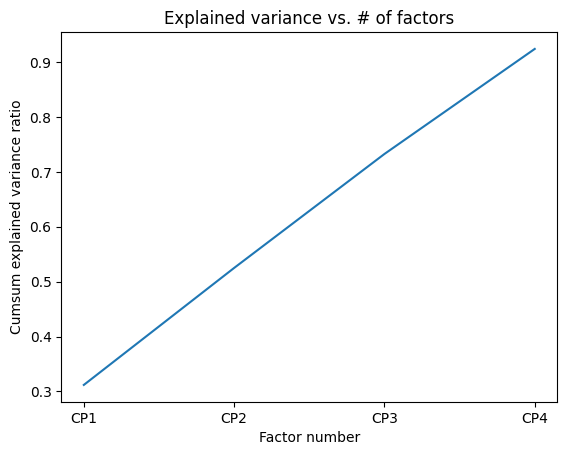

array([0.31184077, 0.21311087, 0.20761174, 0.19138392])

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Cumul de variance expliquée
list_acp = ["CP1", "CP2", "CP3","CP4"]
plt.plot(list_acp, np.cumsum(acp.explained_variance_ratio_[:4]))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()
acp.explained_variance_ratio_[:4]


Interprétation:

D'après l'analyse du graphique à dispersion, on peut conclure que les quatre p facteurs expliquent une grande partie de la variance des données. L'ajout de facteurs supplémentaires explique de moins en moins de variance, ce qui suggère que les quatre  facteurs sont les plus importants pour expliquer les données.

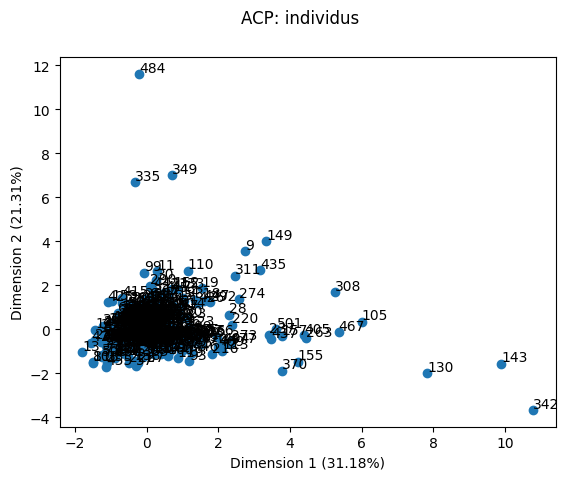

In [39]:
# plotting scatter plot
plt.scatter(coord[:,0],coord[:,1])

#pourcentage des axes
pr1=acp.explained_variance_ratio_[0]/np.sum(acp.explained_variance_ratio_)
pr1=round(pr1*100,2)
pr2=acp.explained_variance_ratio_[1]/np.sum(acp.explained_variance_ratio_)
pr2=round(pr2*100,2)


# Loop for annotation of all points
for i in range(len(coord)):
    plt.annotate(df.index[i],(coord[i,0],coord[i,1] + 0.1))
plt.xlabel("Dimension 1 ({}%)".format(pr1)) # modification du nom de l'axe X
plt.ylabel("Dimension 2 ({}%)".format(pr2)) # idem pour axe Y
plt.suptitle("ACP: individus") # titre général
plt.show()

Interprétation:

D'après l'analyse du graphique , on peut conclure que les dimensions 1 et 2 capturent une grande partie de la variabilité des données. La dimension 1 semble être plus importante que la dimension 2, car elle explique une plus grande proportion de la variance totale des données.


In [40]:
#contributions aux axes

ctr = coord**2
for j in range(4):
    ctr[:,j] = ctr[:,j]/np.sum(ctr[:,j])

df_ctr_cp1cp2 = pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
df_ctr_cp1cp2

,id,CTR_1,CTR_2
0,0,3.798178e-08,0.000397
1,1,9.096316e-05,0.000015
2,2,1.259358e-03,0.000470
3,3,3.810055e-04,0.000397
4,4,9.910056e-07,0.000426
...,...,...,...
505,505,1.185350e-03,0.000443
506,506,1.972932e-03,0.002978
507,507,1.659286e-03,0.000117
508,508,3.646756e-04,0.000380


Interprétation:

D'après l'analyse du tableau, on peut conclure que les variables CTR_1 et CTR_2 sont les plus importantes pour expliquer la variance des données dans les dimensions 1 et 2. Cela suggère que ces variables sont les plus discriminantes pour distinguer les individus les uns des autres.


In [41]:
#qualité de représentation des individus - COS2
di = np.sum(coord**2,axis=1)
cos2 = coord**2
for j in range(4):
    cos2[:,j] = cos2[:,j]/di
df_ctr_12 = pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
df_ctr_12

,id,COS2_1,COS2_2
0,0,0.000048,0.340455
1,1,0.225323,0.025317
2,2,0.601044,0.153445
3,3,0.449496,0.319763
4,4,0.001231,0.361545
...,...,...,...
505,505,0.598592,0.152871
506,506,0.186785,0.192695
507,507,0.577123,0.027783
508,508,0.293072,0.208903


Interprétation:

D'après l'analyse du tableau, on peut conclure que la plupart des individus sont bien représentés dans l'espace des composantes principales car La plupart des individus ont un COS2 supérieur à 0,2. Cela signifie que les deux premières composantes principales capturent une grande partie de la variabilité des données et que les individus sont bien distingués les uns des autres dans cet espace.

In [42]:
acp.explained_variance_

array([1.56226713, 1.06764776, 1.04009811, 0.95879961, 0.38101057])

Observations:

CP1 explique 1,56226713 , soit 39,05% de la variance totale des données.
CP2 explique 1,06764776 , soit 26,66% de la variance totale des données.
CP2 explique 1,04009811 , soit 26,00% de la variance totale des données.
CP3 explique 0,95879961 , soit 24,00% de la variance totale des données.
CP4 explique 0,38101057 , soit 9,52% de la variance totale des données.
on peut conclure que les 3 premières CP expliquent une grande partie de la variance totale des données. Cela signifie que ces 3 CP capturent la plupart de l'information contenue dans les données originales.

In [43]:
#!pip install mlxtend
from mlxtend.plotting import plot_pca_correlation_graph

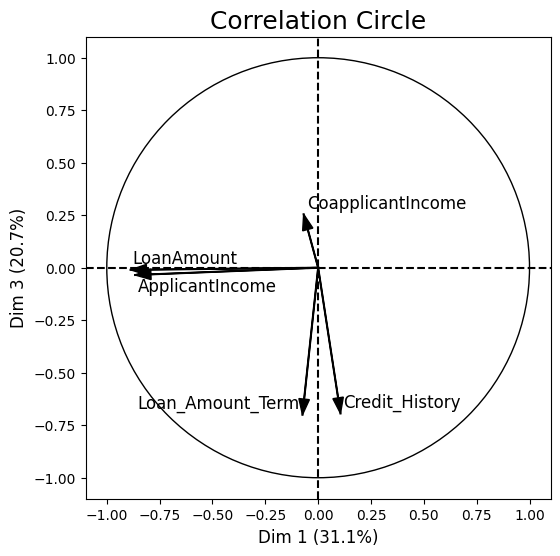

In [44]:
figure, correlation_matrix = plot_pca_correlation_graph(Z,
                                                        df.columns.values,
                                                        dimensions=(1, 3),
                                                        figure_axis_size=6)

Interprétation:

D'après l'analyse du cercle de corrélation, on peut conclure que le montant du prêt est fortement corrélé à la durée du prêt et à l'historique de crédit. Cela signifie que les prêteurs prennent en compte à la fois la capacité de remboursement du demandeur (représentée par son revenu et son historique de crédit) et la durée pendant laquelle il souhaite emprunter l'argent pour déterminer le montant du prêt qu'ils sont prêts à accorder.

